问题3：催化剂组合与温度优化
基于两阶段方法演进：从单因素优化到全局优化
优化数据准备完成: 109个样本
收率预测模型验证: R² = 0.7674 ± 0.1175
参数可行域:
  温度: [250.000, 450.000]
  Co负载量: [0.500, 5.000]
  乙醇浓度: [0.300, 2.100]
  总催化剂质量: [20.000, 400.000]
  装料比: [0.493, 2.030]

数据探索与可视化
已保存: results/问题3/数据探索分析.png


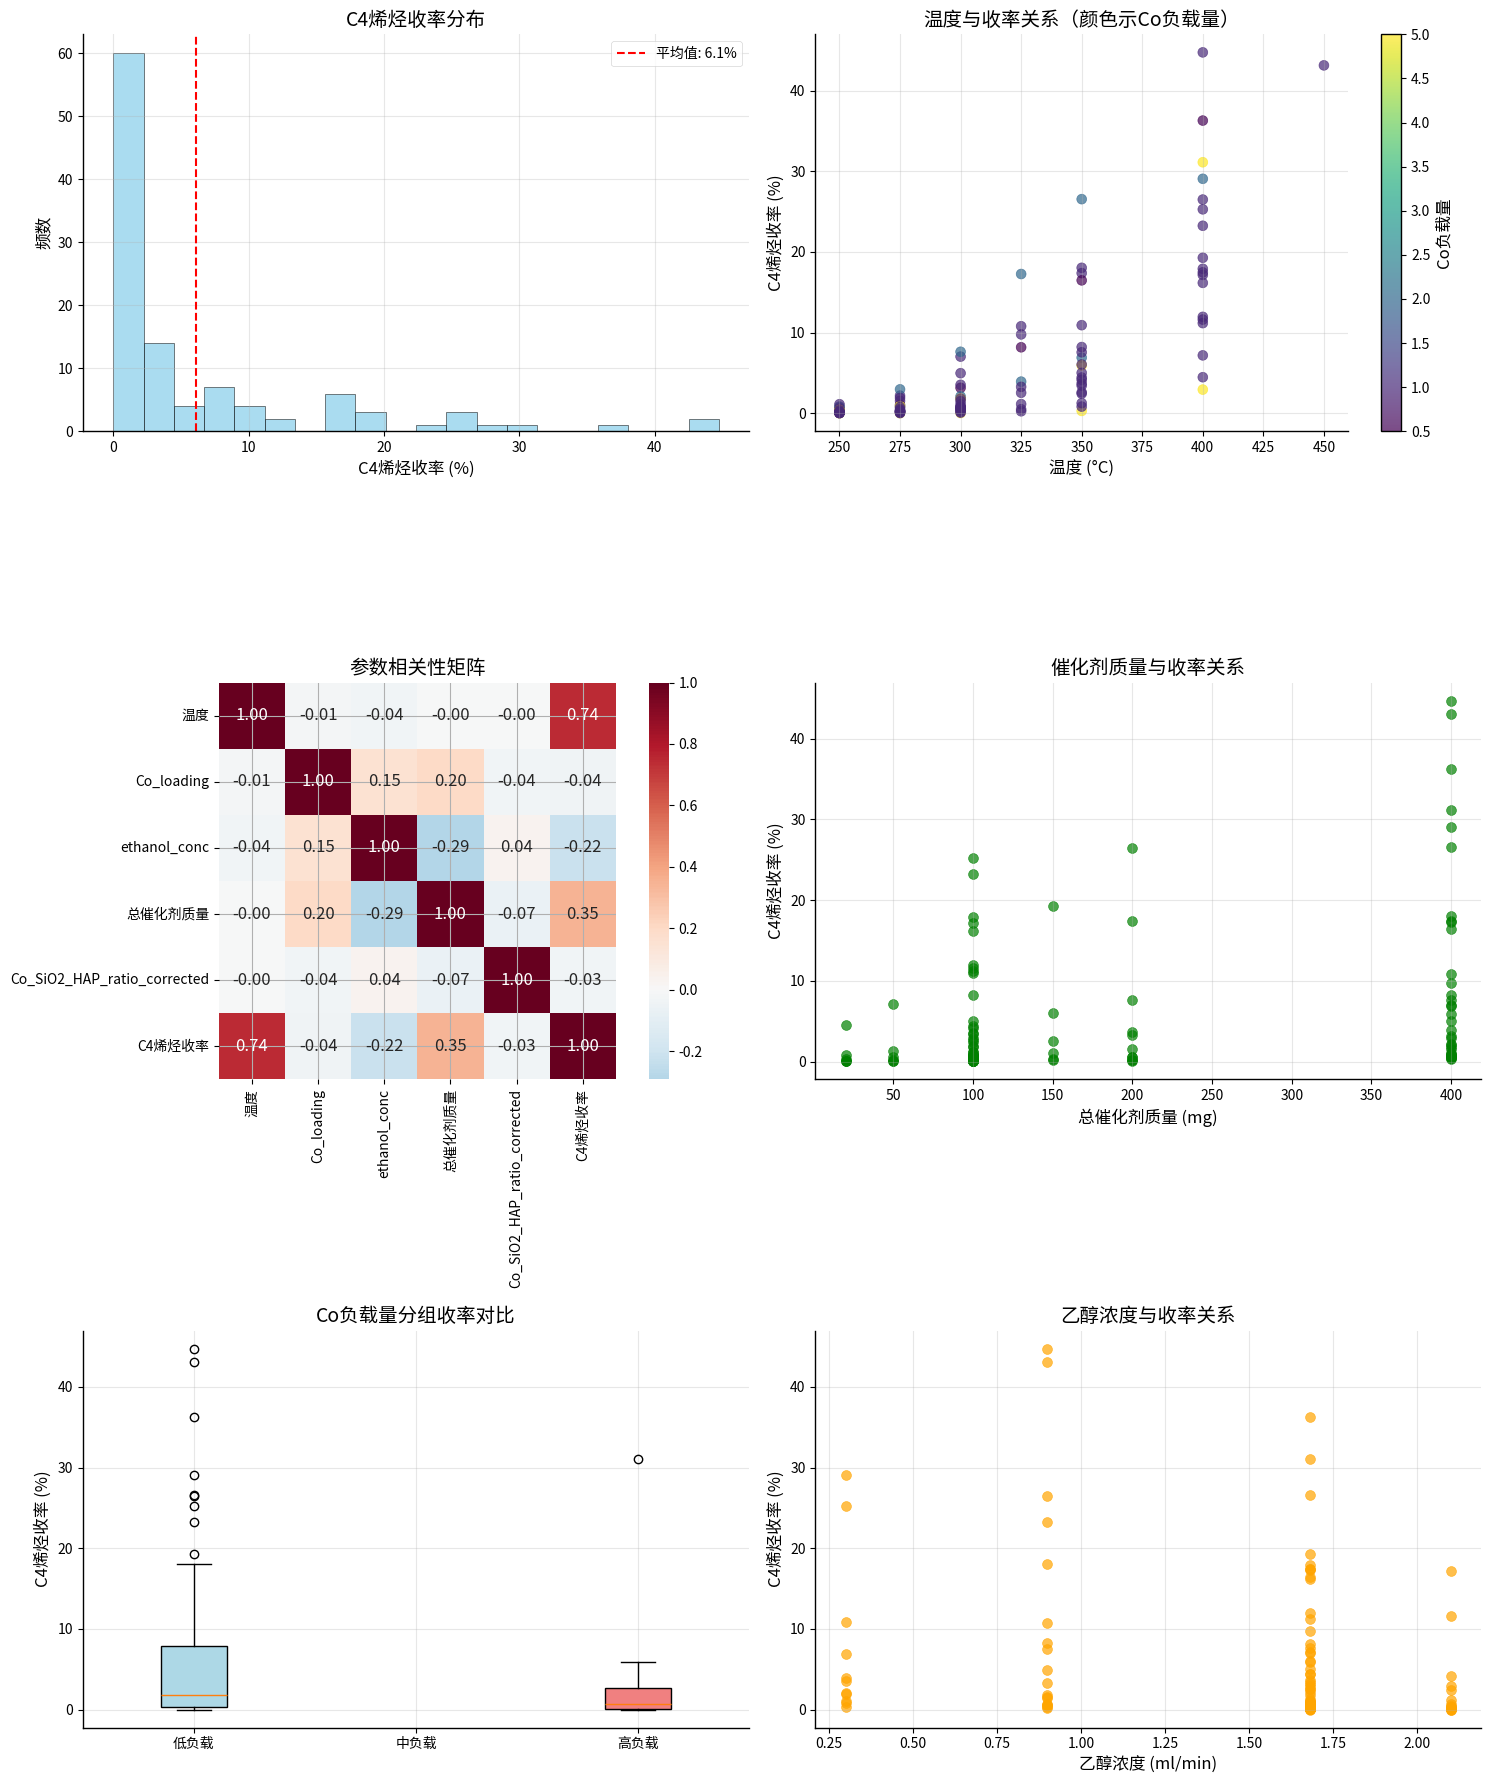


发现 18 种催化剂组合
现有催化剂性能（前5名）:
                      催化剂组合ID  最佳温度      最大收率
Co1.0_SiO2200_HAP200_EtOH0.90   400 44.728060
Co0.5_SiO2200_HAP200_EtOH1.68   400 36.277819
Co5.0_SiO2200_HAP200_EtOH1.68   400 31.113665
Co2.0_SiO2200_HAP200_EtOH0.30   400 29.062382
Co2.0_SiO2200_HAP200_EtOH1.68   350 26.540805

第一阶段：单因素逐步优化方法
方法思路: 基于工程经验，逐个优化参数
起始参数（现有最佳催化剂）:
  温度: 400.000
  Co负载量: 1.000
  乙醇浓度: 0.900
  总催化剂质量: 400.000
  装料比: 1.000
起始收率: 32.4295

优化参数: 温度
  最佳值: 450.000 (改进: +19.6072)

优化参数: Co负载量
  最佳值: 0.950 (改进: +0.0064)

优化参数: 乙醇浓度
  最佳值: 2.100 (改进: +1.1438)

优化参数: 总催化剂质量
  最佳值: 400.000 (改进: +0.0000)

优化参数: 装料比
  最佳值: 0.493 (改进: +1.4356)

单因素优化结果:
  最终收率: 54.6226
  总体改进: +22.1931
  最终参数:
    温度: 450.000
    Co负载量: 0.950
    乙醇浓度: 2.100
    总催化剂质量: 400.000
    装料比: 0.493

单因素优化过程可视化
已保存: results/问题3/单因素优化过程.png


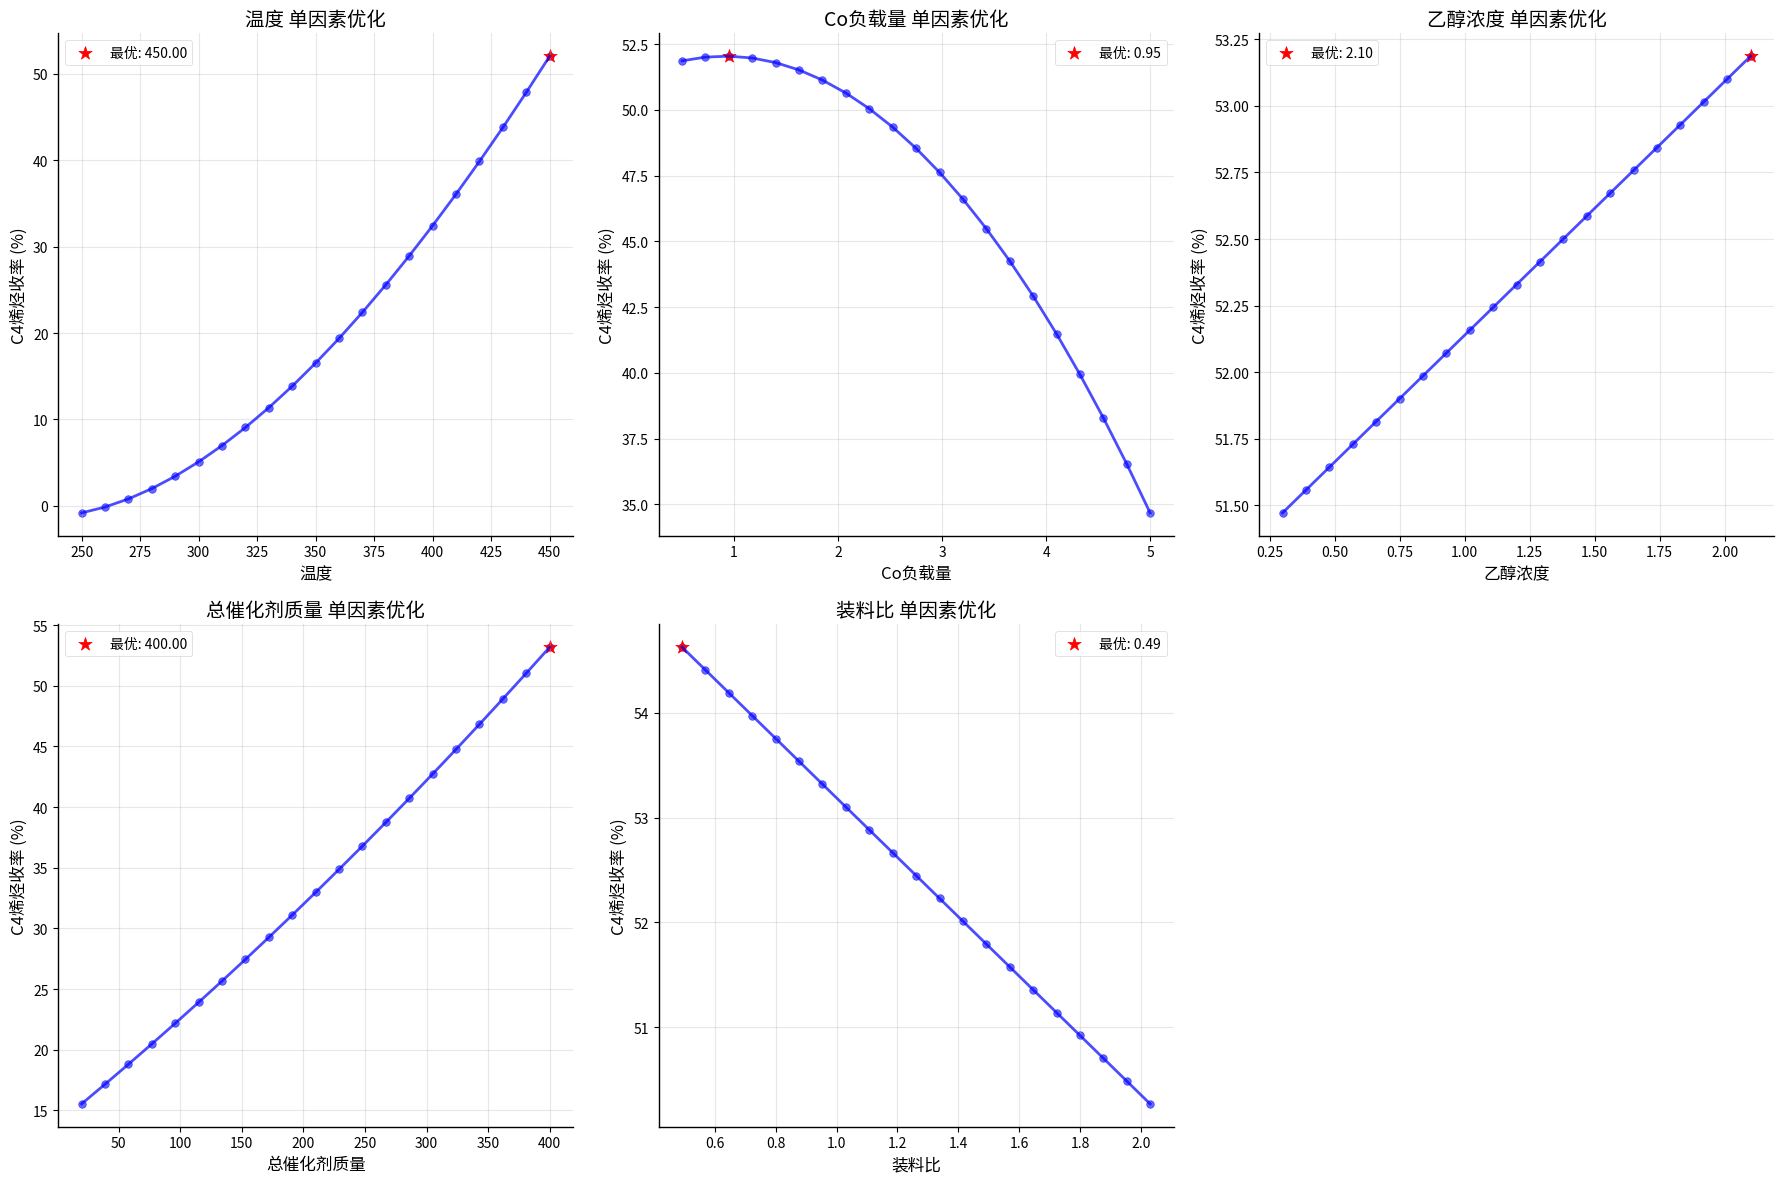


第二阶段：差分进化全局优化
方法演进动机:
  - 单因素优化忽略参数间交互效应
  - 逐步优化容易陷入局部最优
  - 需要全局搜索考虑参数协同作用

开始全局优化搜索...

全局优化成功:
  理论最优收率: 57.1810
  迭代次数: 32
  函数评估: 2523

最优参数组合:
  温度: 450.0000
  Co负载量: 2.5183
  乙醇浓度: 2.1000
  总催化剂质量: 400.0000
  装料比: 0.4925

优化方法对比可视化
已保存: results/问题3/优化方法对比分析.png


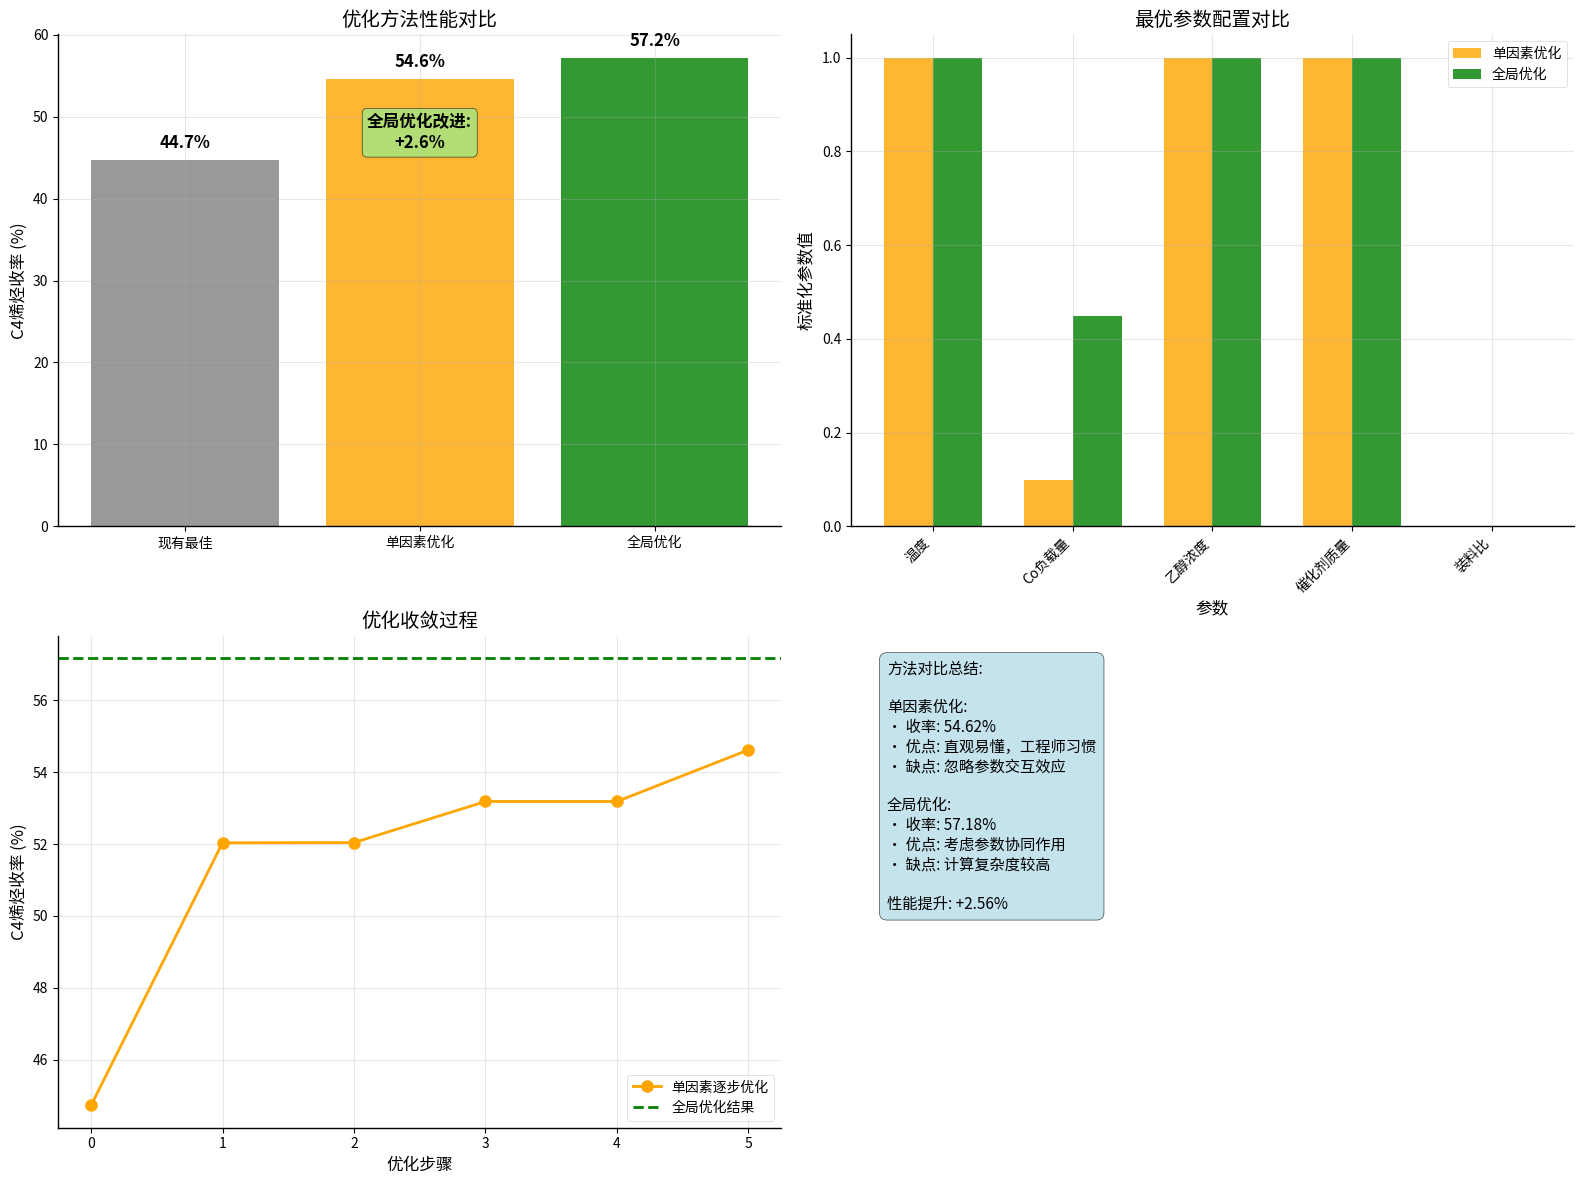


参数敏感性分析
已保存: results/问题3/参数敏感性分析.png


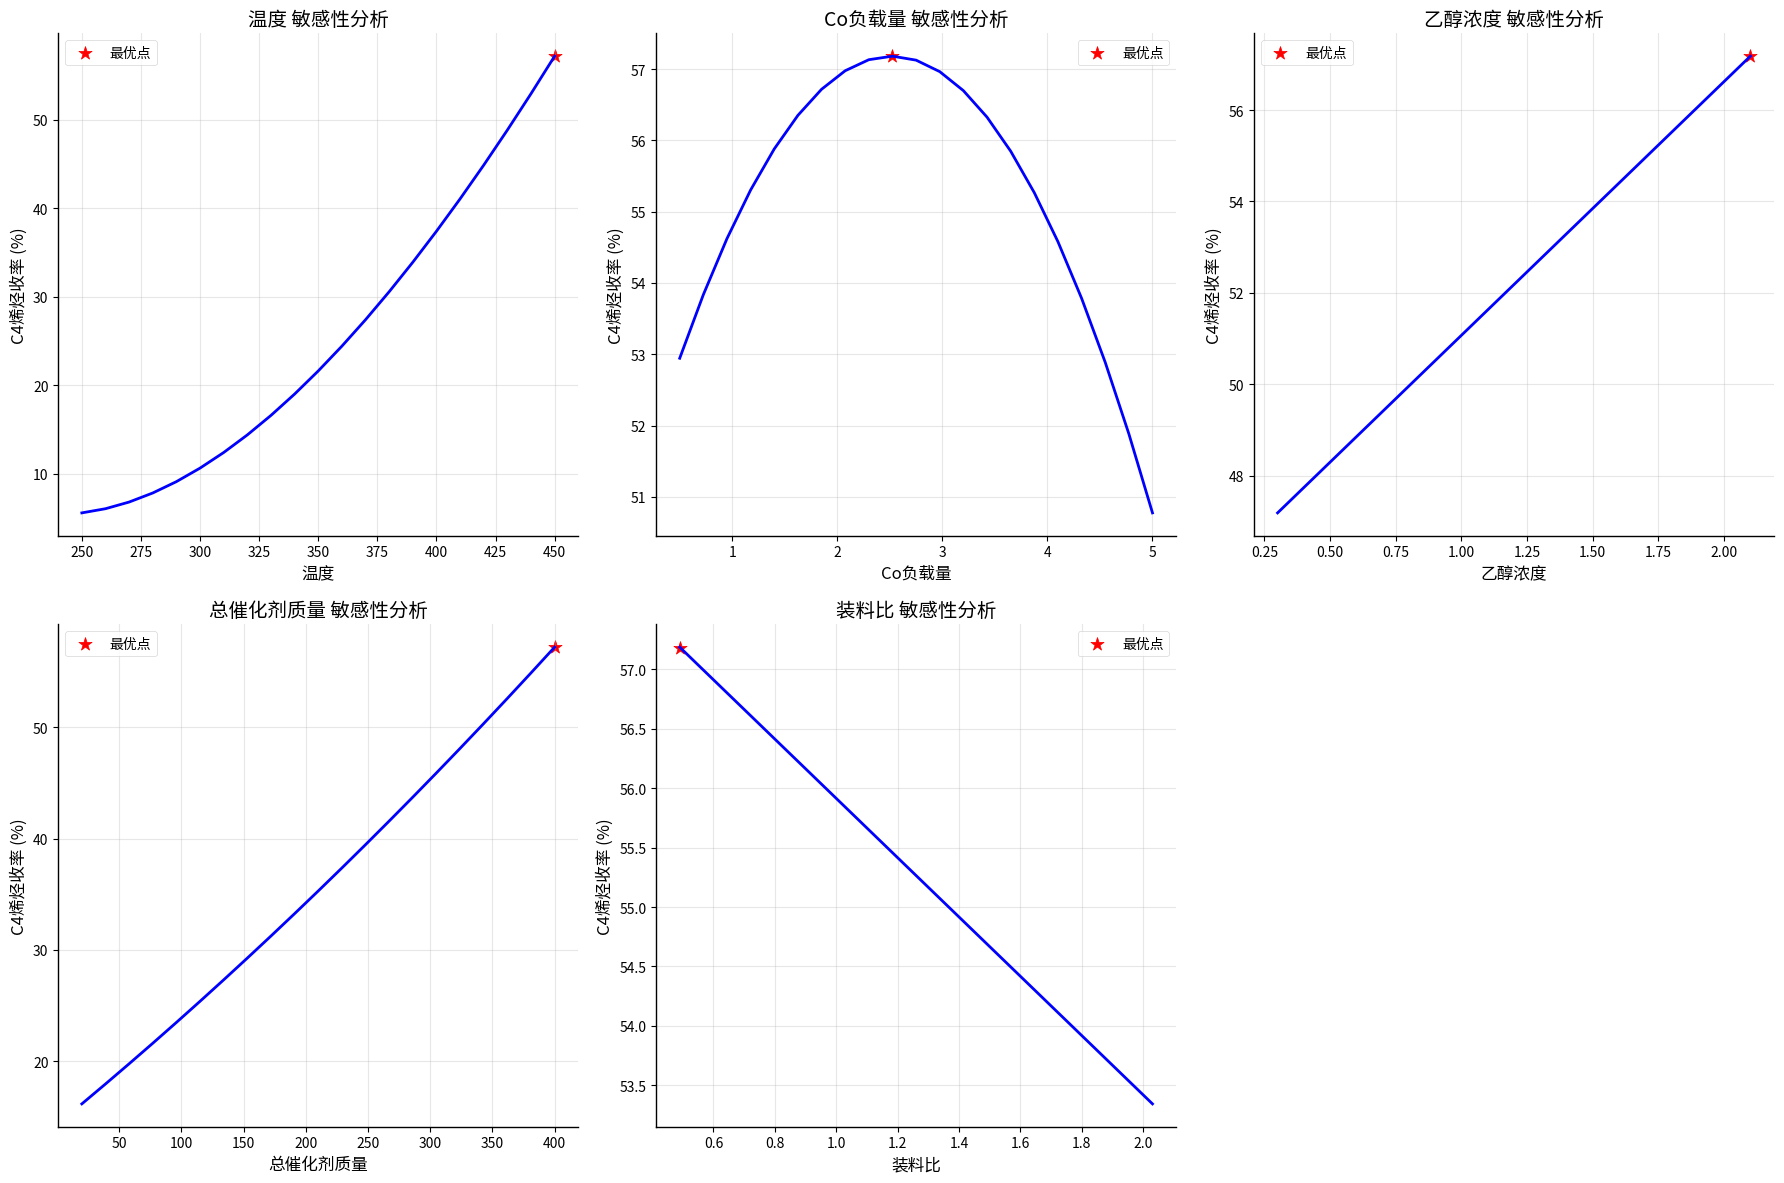


问题3优化方法演进结果报告

【第一阶段：单因素逐步优化】
方法特点: 基于工程经验的逐步参数调优
优化结果:
  最终收率: 54.6226
  相比现有最佳改进: +22.1931
逐步优化过程:
  步骤1 - 温度: 改进 +19.6072
  步骤2 - Co负载量: 改进 +0.0064
  步骤3 - 乙醇浓度: 改进 +1.1438
  步骤4 - 总催化剂质量: 改进 +0.0000
  步骤5 - 装料比: 改进 +1.4356
方法局限:
  - 忽略参数间交互效应
  - 优化顺序影响最终结果
  - 容易陷入局部最优

【第二阶段：全局优化突破】
差分进化结果:
  理论最优收率: 57.1810
  最优温度: 450.0°C
  算法效率: 32 代收敛
性能突破:
  现有最佳收率: 44.7281
  单因素优化收率: 54.6226
  全局优化收率: 57.1810
  相比现有最佳: +12.4529 (+27.8%)
  相比单因素优化: +2.5584 (+4.7%)

【方法学创新总结】
1. 从经验优化到科学优化:
   - 单因素优化: 符合工程师直觉但忽略交互
   - 全局优化: 考虑参数协同作用
2. 技术贡献:
   - 参数交互效应的重要性: +2.56%
   - 系统性优化的必要性
   - 全局搜索的技术优势
3. 工程指导价值:
   - 最优温度: 450.0°C
   - 参数协同配置的重要性
   - 传统经验方法的局限性

保存优化结果
已保存: results/问题3/催化剂性能分析.csv
已保存: results/问题3/优化方法对比结果.csv
已保存: results/问题3/参数配置对比.csv
优化结果已保存，共生成 3 个结果文件

问题3两阶段优化方法演进完成！


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize, differential_evolution
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
plt.rcParams['axes.unicode_minus'] = False

import os
PROBLEM_NUM = 3
os.makedirs(f'results/问题{PROBLEM_NUM}', exist_ok=True)

def save_result(data, description, file_format='csv'):
    if file_format == 'csv':
        filename = f"results/问题{PROBLEM_NUM}/{description}.csv"
        data.to_csv(filename, encoding='utf-8-sig', index=False)
    elif file_format == 'excel':
        filename = f"results/问题{PROBLEM_NUM}/{description}.xlsx"
        data.to_excel(filename, index=False, engine='openpyxl')
    print(f"已保存: {filename}")
    return filename

def save_plot(description, dpi=300, format='png'):
    filename = f"results/问题{PROBLEM_NUM}/{description}.{format}"
    plt.savefig(filename, dpi=dpi, bbox_inches='tight')
    print(f"已保存: {filename}")
    return filename

def load_data(filename, encoding='utf-8-sig'):
    filepath = f"data/{filename}"
    if filename.endswith('.csv'):
        return pd.read_csv(filepath, encoding=encoding)
    elif filename.endswith('.xlsx'):
        return pd.read_excel(filepath, engine='openpyxl')
    else:
        raise ValueError(f"不支持的文件格式: {filename}")

def prepare_optimization_data():
    raw_data = load_data("附件1.csv")
    data = raw_data.copy()
    
    data['C4烯烃收率'] = data['乙醇转化率(%)'] * data['C4烯烃选择性(%)'] / 100
    data['含HAP'] = data['HAP_mass'] > 0
    data['Co_SiO2_HAP_ratio_corrected'] = np.where(
        data['HAP_mass'] > 0,
        data['Co_SiO2_mass'] / data['HAP_mass'],
        -1
    )
    
    data['温度_倒数'] = 1 / (data['温度'] + 273.15)
    data['温度_催化剂质量'] = data['温度'] * data['总催化剂质量']
    data['温度_Co负载量'] = data['温度'] * data['Co_loading']
    data = data.replace([np.inf, -np.inf], np.nan)
    
    catalyst_key_params = ['Co_loading', 'Co_SiO2_mass', 'HAP_mass', 'ethanol_conc']
    data['催化剂组合ID'] = data[catalyst_key_params].apply(
        lambda x: f"Co{x['Co_loading']:.1f}_SiO2{x['Co_SiO2_mass']:.0f}_HAP{x['HAP_mass']:.0f}_EtOH{x['ethanol_conc']:.2f}", 
        axis=1
    )
    
    analysis_data = data[data['含HAP']].copy()
    print(f"优化数据准备完成: {len(analysis_data)}个样本")
    return analysis_data

def build_yield_prediction_model(data):
    predictor_vars = ['温度', 'Co_loading', 'ethanol_conc', '总催化剂质量', 'Co_SiO2_HAP_ratio_corrected']
    enhanced_features = predictor_vars + ['温度_倒数', '温度_催化剂质量', '温度_Co负载量']
    
    X = data[enhanced_features].select_dtypes(include=[np.number])
    y = data['C4烯烃收率']
    
    valid_mask = ~(X.isnull().any(axis=1) | y.isnull())
    X_clean = X[valid_mask]
    y_clean = y[valid_mask]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_clean)
    
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=2, interaction_only=True)),
        ('ridge', Ridge(alpha=10.0))
    ])
    
    model.fit(X_scaled, y_clean)
    cv_scores = cross_val_score(model, X_scaled, y_clean, cv=5, scoring='r2')
    print(f"收率预测模型验证: R² = {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    
    return model, scaler, enhanced_features

def visualize_data_exploration(data):
    """数据探索可视化"""
    fig, axes = plt.subplots(3, 2, figsize=(16, 18))
    
    # 1. 收率分布
    ax1 = axes[0, 0]
    ax1.hist(data['C4烯烃收率'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_xlabel('C4烯烃收率 (%)')
    ax1.set_ylabel('频数')
    ax1.set_title('C4烯烃收率分布')
    ax1.grid(True, alpha=0.3)
    
    mean_yield = data['C4烯烃收率'].mean()
    ax1.axvline(mean_yield, color='red', linestyle='--', label=f'平均值: {mean_yield:.1f}%')
    ax1.legend()
    
    # 2. 温度vs收率散点图
    ax2 = axes[0, 1]
    scatter = ax2.scatter(data['温度'], data['C4烯烃收率'], 
                         c=data['Co_loading'], cmap='viridis', alpha=0.7, s=50)
    ax2.set_xlabel('温度 (°C)')
    ax2.set_ylabel('C4烯烃收率 (%)')
    ax2.set_title('温度与收率关系（颜色示Co负载量）')
    ax2.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax2, label='Co负载量')
    
    # 3. 参数相关性热力图
    ax3 = axes[1, 0]
    param_vars = ['温度', 'Co_loading', 'ethanol_conc', '总催化剂质量', 'Co_SiO2_HAP_ratio_corrected', 'C4烯烃收率']
    corr_matrix = data[param_vars].corr()
    
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, ax=ax3, 
                fmt='.2f', square=True)
    ax3.set_title('参数相关性矩阵')
    
    # 4. 催化剂质量vs收率
    ax4 = axes[1, 1]
    ax4.scatter(data['总催化剂质量'], data['C4烯烃收率'], 
               alpha=0.7, color='green', s=50)
    ax4.set_xlabel('总催化剂质量 (mg)')
    ax4.set_ylabel('C4烯烃收率 (%)')
    ax4.set_title('催化剂质量与收率关系')
    ax4.grid(True, alpha=0.3)
    
    # 5. Co负载量分组箱线图
    ax5 = axes[2, 0]
    co_groups = pd.cut(data['Co_loading'], bins=3, labels=['低', '中', '高'])
    data_grouped = [data[co_groups == group]['C4烯烃收率'].dropna() for group in ['低', '中', '高']]
    
    box_plot = ax5.boxplot(data_grouped, labels=['低负载', '中负载', '高负载'], patch_artist=True)
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
    
    ax5.set_ylabel('C4烯烃收率 (%)')
    ax5.set_title('Co负载量分组收率对比')
    ax5.grid(True, alpha=0.3)
    
    # 6. 乙醇浓度vs收率
    ax6 = axes[2, 1]
    ax6.scatter(data['ethanol_conc'], data['C4烯烃收率'], 
               alpha=0.7, color='orange', s=50)
    ax6.set_xlabel('乙醇浓度 (ml/min)')
    ax6.set_ylabel('C4烯烃收率 (%)')
    ax6.set_title('乙醇浓度与收率关系')
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    save_plot("数据探索分析")
    plt.show()

def get_parameter_bounds(data):
    bounds = [
        (data['温度'].min(), data['温度'].max()),
        (data['Co_loading'].min(), data['Co_loading'].max()),
        (data['ethanol_conc'].min(), data['ethanol_conc'].max()),
        (data['总催化剂质量'].min(), data['总催化剂质量'].max()),
        (data[data['Co_SiO2_HAP_ratio_corrected'] > 0]['Co_SiO2_HAP_ratio_corrected'].min(),
         data[data['Co_SiO2_HAP_ratio_corrected'] > 0]['Co_SiO2_HAP_ratio_corrected'].max())
    ]
    
    print("参数可行域:")
    param_names = ['温度', 'Co负载量', '乙醇浓度', '总催化剂质量', '装料比']
    for i, (param, (min_val, max_val)) in enumerate(zip(param_names, bounds)):
        print(f"  {param}: [{min_val:.3f}, {max_val:.3f}]")
    
    return bounds

def create_objective_function(model, scaler, bounds):
    def objective(params):
        for i, (param, (min_val, max_val)) in enumerate(zip(params, bounds)):
            if not (min_val <= param <= max_val):
                return 1000
        
        enhanced_params = list(params)
        enhanced_params.append(1 / (params[0] + 273.15))
        enhanced_params.append(params[0] * params[3])
        enhanced_params.append(params[0] * params[1])
        
        try:
            X_scaled = scaler.transform([enhanced_params])
            yield_pred = model.predict(X_scaled)[0]
            return -yield_pred
        except:
            return 1000
    
    return objective

def phase1_univariate_optimization(data, model, scaler, bounds):
    """第一阶段：单因素逐步优化（有缺陷的方法）"""
    print("\n第一阶段：单因素逐步优化方法")
    print("方法思路: 基于工程经验，逐个优化参数")
    
    objective = create_objective_function(model, scaler, bounds)
    param_names = ['温度', 'Co负载量', '乙醇浓度', '总催化剂质量', '装料比']
    
    # 从数据中最佳催化剂开始
    best_sample = data.loc[data['C4烯烃收率'].idxmax()]
    current_params = [
        best_sample['温度'],
        best_sample['Co_loading'],
        best_sample['ethanol_conc'],
        best_sample['总催化剂质量'],
        best_sample['Co_SiO2_HAP_ratio_corrected']
    ]
    
    print(f"起始参数（现有最佳催化剂）:")
    for name, value in zip(param_names, current_params):
        print(f"  {name}: {value:.3f}")
    
    initial_yield = -objective(current_params)
    print(f"起始收率: {initial_yield:.4f}")
    
    # 逐个参数优化
    optimization_history = []
    
    for i, (param_name, (min_val, max_val)) in enumerate(zip(param_names, bounds)):
        print(f"\n优化参数: {param_name}")
        
        # 单参数网格搜索
        param_values = np.linspace(min_val, max_val, 21)  # 21个点
        best_value = current_params[i]
        best_yield = -objective(current_params)
        
        yields_history = []
        
        for value in param_values:
            test_params = current_params.copy()
            test_params[i] = value
            yield_pred = -objective(test_params)
            yields_history.append(yield_pred)
            
            if yield_pred > best_yield:
                best_yield = yield_pred
                best_value = value
        
        # 更新参数
        old_value = current_params[i]
        current_params[i] = best_value
        improvement = best_yield - (-objective([current_params[j] if j != i else old_value for j in range(5)]))
        
        print(f"  最佳值: {best_value:.3f} (改进: +{improvement:.4f})")
        
        optimization_history.append({
            'parameter': param_name,
            'old_value': old_value,
            'new_value': best_value,
            'improvement': improvement,
            'cumulative_yield': best_yield,
            'param_values': param_values,
            'yields': yields_history
        })
    
    final_yield = -objective(current_params)
    total_improvement = final_yield - initial_yield
    
    print(f"\n单因素优化结果:")
    print(f"  最终收率: {final_yield:.4f}")
    print(f"  总体改进: +{total_improvement:.4f}")
    print(f"  最终参数:")
    for name, value in zip(param_names, current_params):
        print(f"    {name}: {value:.3f}")
    
    univariate_result = {
        'success': True,
        'yield': final_yield,
        'params': current_params,
        'improvement': total_improvement,
        'history': optimization_history
    }
    
    return univariate_result

def phase2_global_optimization(data, model, scaler, bounds):
    """第二阶段：差分进化全局优化"""
    print("\n第二阶段：差分进化全局优化")
    print("方法演进动机:")
    print("  - 单因素优化忽略参数间交互效应")
    print("  - 逐步优化容易陷入局部最优")
    print("  - 需要全局搜索考虑参数协同作用")
    
    objective = create_objective_function(model, scaler, bounds)
    
    print(f"\n开始全局优化搜索...")
    
    try:
        result = differential_evolution(
            objective, 
            bounds, 
            seed=42, 
            maxiter=1000,
            popsize=15
        )
        
        if result.success:
            optimal_yield = -result.fun
            optimal_params = result.x
            
            print(f"\n全局优化成功:")
            print(f"  理论最优收率: {optimal_yield:.4f}")
            print(f"  迭代次数: {result.nit}")
            print(f"  函数评估: {result.nfev}")
            
            param_names = ['温度', 'Co负载量', '乙醇浓度', '总催化剂质量', '装料比']
            print(f"\n最优参数组合:")
            for name, value in zip(param_names, optimal_params):
                print(f"  {name}: {value:.4f}")
            
            global_result = {
                'success': True,
                'yield': optimal_yield,
                'params': optimal_params,
                'iterations': result.nit,
                'evaluations': result.nfev
            }
            
        else:
            print(f"全局优化失败: {result.message}")
            global_result = {'success': False, 'message': result.message}
            
    except Exception as e:
        print(f"全局优化错误: {str(e)}")
        global_result = {'success': False, 'message': str(e)}
    
    return global_result

def analyze_catalyst_performance(data):
    catalyst_performance = []
    
    for catalyst_id in data['催化剂组合ID'].unique():
        catalyst_data = data[data['催化剂组合ID'] == catalyst_id]
        
        if len(catalyst_data) > 0:
            best_row = catalyst_data.loc[catalyst_data['C4烯烃收率'].idxmax()]
            
            catalyst_performance.append({
                '催化剂组合ID': catalyst_id,
                '最佳温度': best_row['温度'],
                '最大收率': best_row['C4烯烃收率'],
                '对应转化率': best_row['乙醇转化率(%)'],
                '对应选择性': best_row['C4烯烃选择性(%)'],
                'Co负载量': best_row['Co_loading'],
                '乙醇浓度': best_row['ethanol_conc'],
                '总催化剂质量': best_row['总催化剂质量'],
                '装料比': best_row['Co_SiO2_HAP_ratio_corrected']
            })
    
    catalyst_df = pd.DataFrame(catalyst_performance)
    catalyst_df = catalyst_df.sort_values('最大收率', ascending=False)
    
    print(f"\n发现 {len(catalyst_df)} 种催化剂组合")
    print("现有催化剂性能（前5名）:")
    display_cols = ['催化剂组合ID', '最佳温度', '最大收率']
    print(catalyst_df.head(5)[display_cols].to_string(index=False))
    
    return catalyst_df

def visualize_univariate_optimization(univariate_result):
    """可视化单因素优化过程"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    param_names = ['温度', 'Co负载量', '乙醇浓度', '总催化剂质量', '装料比']
    
    for i, (param_name, history) in enumerate(zip(param_names, univariate_result['history'])):
        ax = axes[i]
        
        param_values = history['param_values']
        yields = history['yields']
        best_value = history['new_value']
        
        # 绘制优化曲线
        ax.plot(param_values, yields, 'b-', linewidth=2, alpha=0.7)
        ax.scatter(param_values, yields, c='blue', alpha=0.6, s=30)
        
        # 标记最优点
        best_yield = max(yields)
        ax.scatter([best_value], [best_yield], c='red', s=100, marker='*', 
                  label=f'最优: {best_value:.2f}')
        
        ax.set_xlabel(param_name)
        ax.set_ylabel('C4烯烃收率 (%)')
        ax.set_title(f'{param_name} 单因素优化')
        ax.grid(True, alpha=0.3)
        ax.legend()
    
    # 删除第6个子图
    fig.delaxes(axes[5])
    
    plt.tight_layout()
    save_plot("单因素优化过程")
    plt.show()

def visualize_optimization_comparison(univariate_result, global_result, catalyst_df):
    """可视化优化方法对比"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. 方法对比
    ax1 = axes[0, 0]
    
    methods = ['现有最佳', '单因素优化', '全局优化']
    yields = [
        catalyst_df.iloc[0]['最大收率'],
        univariate_result['yield'],
        global_result['yield'] if global_result['success'] else 0
    ]
    
    colors = ['gray', 'orange', 'green']
    bars = ax1.bar(methods, yields, color=colors, alpha=0.8)
    
    ax1.set_ylabel('C4烯烃收率 (%)')
    ax1.set_title('优化方法性能对比')
    ax1.grid(True, alpha=0.3)
    
    # 添加数值标签
    for bar, yield_val in zip(bars, yields):
        ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                f'{yield_val:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # 显示改进幅度
    if global_result['success']:
        improvement = global_result['yield'] - univariate_result['yield']
        ax1.text(0.5, 0.8, f'全局优化改进:\n+{improvement:.1f}%', 
                transform=ax1.transAxes, ha='center', va='center',
                bbox=dict(boxstyle="round", facecolor='lightgreen', alpha=0.7),
                fontsize=12, fontweight='bold')
    
    # 2. 参数对比雷达图
    ax2 = axes[0, 1]
    
    param_names = ['温度', 'Co负载量', '乙醇浓度', '催化剂质量', '装料比']
    
    # 标准化参数值
    param_bounds = [
        (250, 450), (0.5, 5.0), (0.3, 2.1), (20, 400), (0.49, 2.03)
    ]
    
    univariate_normalized = [(p - bounds[0]) / (bounds[1] - bounds[0]) 
                           for p, bounds in zip(univariate_result['params'], param_bounds)]
    
    if global_result['success']:
        global_normalized = [(p - bounds[0]) / (bounds[1] - bounds[0]) 
                           for p, bounds in zip(global_result['params'], param_bounds)]
    
    x = np.arange(len(param_names))
    width = 0.35
    
    ax2.bar(x - width/2, univariate_normalized, width, 
           label='单因素优化', alpha=0.8, color='orange')
    
    if global_result['success']:
        ax2.bar(x + width/2, global_normalized, width, 
               label='全局优化', alpha=0.8, color='green')
    
    ax2.set_xlabel('参数')
    ax2.set_ylabel('标准化参数值')
    ax2.set_title('最优参数配置对比')
    ax2.set_xticks(x)
    ax2.set_xticklabels(param_names, rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. 优化收敛过程
    ax3 = axes[1, 0]
    
    # 单因素优化的累积改进
    cumulative_yields = [catalyst_df.iloc[0]['最大收率']]
    for history in univariate_result['history']:
        cumulative_yields.append(history['cumulative_yield'])
    
    steps = range(len(cumulative_yields))
    ax3.plot(steps, cumulative_yields, 'o-', linewidth=2, markersize=8, 
             color='orange', label='单因素逐步优化')
    
    if global_result['success']:
        # 全局优化的最终结果
        ax3.axhline(y=global_result['yield'], color='green', linestyle='--', 
                   linewidth=2, label=f'全局优化结果')
    
    ax3.set_xlabel('优化步骤')
    ax3.set_ylabel('C4烯烃收率 (%)')
    ax3.set_title('优化收敛过程')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    # 4. 方法优缺点对比
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    # 文本总结
    summary_text = "方法对比总结:\n\n"
    summary_text += "单因素优化:\n"
    summary_text += f"• 收率: {univariate_result['yield']:.2f}%\n"
    summary_text += "• 优点: 直观易懂，工程师习惯\n"
    summary_text += "• 缺点: 忽略参数交互效应\n\n"
    
    if global_result['success']:
        summary_text += "全局优化:\n"
        summary_text += f"• 收率: {global_result['yield']:.2f}%\n"
        summary_text += "• 优点: 考虑参数协同作用\n"
        summary_text += "• 缺点: 计算复杂度较高\n\n"
        
        improvement = global_result['yield'] - univariate_result['yield']
        summary_text += f"性能提升: +{improvement:.2f}%"
    
    ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes, 
             fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.7))
    
    plt.tight_layout()
    save_plot("优化方法对比分析")
    plt.show()

def visualize_parameter_sensitivity(data, model, scaler, global_result):
    """参数敏感性分析"""
    if not global_result['success']:
        return
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    objective = create_objective_function(model, scaler, 
                                        [(250, 450), (0.5, 5.0), (0.3, 2.1), (20, 400), (0.49, 2.03)])
    
    param_names = ['温度', 'Co负载量', '乙醇浓度', '总催化剂质量', '装料比']
    param_ranges = [
        np.linspace(250, 450, 21),
        np.linspace(0.5, 5.0, 21),
        np.linspace(0.3, 2.1, 21),
        np.linspace(20, 400, 21),
        np.linspace(0.49, 2.03, 21)
    ]
    
    optimal_params = global_result['params']
    
    for i, (param_name, param_range) in enumerate(zip(param_names, param_ranges)):
        ax = axes[i]
        
        yields = []
        for value in param_range:
            test_params = optimal_params.copy()
            test_params[i] = value
            yield_pred = -objective(test_params)
            yields.append(yield_pred)
        
        ax.plot(param_range, yields, 'b-', linewidth=2)
        ax.scatter([optimal_params[i]], [global_result['yield']], 
                  c='red', s=100, marker='*', label='最优点')
        
        ax.set_xlabel(param_name)
        ax.set_ylabel('C4烯烃收率 (%)')
        ax.set_title(f'{param_name} 敏感性分析')
        ax.grid(True, alpha=0.3)
        ax.legend()
    
    # 删除第6个子图
    fig.delaxes(axes[5])
    
    plt.tight_layout()
    save_plot("参数敏感性分析")
    plt.show()

def generate_comprehensive_report(univariate_result, global_result, catalyst_df):
    print("\n" + "="*70)
    print("问题3优化方法演进结果报告")
    print("="*70)
    
    # 第一阶段分析
    print("\n【第一阶段：单因素逐步优化】")
    print(f"方法特点: 基于工程经验的逐步参数调优")
    print(f"优化结果:")
    print(f"  最终收率: {univariate_result['yield']:.4f}")
    print(f"  相比现有最佳改进: +{univariate_result['improvement']:.4f}")
    
    print(f"逐步优化过程:")
    for i, history in enumerate(univariate_result['history']):
        print(f"  步骤{i+1} - {history['parameter']}: 改进 +{history['improvement']:.4f}")
    
    print(f"方法局限:")
    print(f"  - 忽略参数间交互效应")
    print(f"  - 优化顺序影响最终结果")
    print(f"  - 容易陷入局部最优")
    
    # 第二阶段分析
    print(f"\n【第二阶段：全局优化突破】")
    if global_result['success']:
        print(f"差分进化结果:")
        print(f"  理论最优收率: {global_result['yield']:.4f}")
        print(f"  最优温度: {global_result['params'][0]:.1f}°C")
        print(f"  算法效率: {global_result.get('iterations', 'N/A')} 代收敛")
        
        # 与两种方法对比
        best_existing = catalyst_df.iloc[0]['最大收率']
        improvement_vs_existing = global_result['yield'] - best_existing
        improvement_vs_univariate = global_result['yield'] - univariate_result['yield']
        
        print(f"性能突破:")
        print(f"  现有最佳收率: {best_existing:.4f}")
        print(f"  单因素优化收率: {univariate_result['yield']:.4f}")
        print(f"  全局优化收率: {global_result['yield']:.4f}")
        print(f"  相比现有最佳: +{improvement_vs_existing:.4f} (+{improvement_vs_existing/best_existing*100:.1f}%)")
        print(f"  相比单因素优化: +{improvement_vs_univariate:.4f} (+{improvement_vs_univariate/univariate_result['yield']*100:.1f}%)")
    
    # 方法学总结
    print(f"\n【方法学创新总结】")
    print(f"1. 从经验优化到科学优化:")
    print(f"   - 单因素优化: 符合工程师直觉但忽略交互")
    print(f"   - 全局优化: 考虑参数协同作用")
    
    print(f"2. 技术贡献:")
    if global_result['success']:
        improvement = global_result['yield'] - univariate_result['yield']
        print(f"   - 参数交互效应的重要性: +{improvement:.2f}%")
        print(f"   - 系统性优化的必要性")
        print(f"   - 全局搜索的技术优势")
    
    print(f"3. 工程指导价值:")
    if global_result['success']:
        print(f"   - 最优温度: {global_result['params'][0]:.1f}°C")
        print(f"   - 参数协同配置的重要性")
        print(f"   - 传统经验方法的局限性")

def save_optimization_results(univariate_result, global_result, catalyst_df):
    # 保存催化剂性能分析
    save_result(catalyst_df, "催化剂性能分析")
    
    # 保存优化对比结果
    comparison_data = []
    
    # 现有最佳
    comparison_data.append({
        '方法': '现有最佳催化剂',
        '收率': catalyst_df.iloc[0]['最大收率'],
        '温度': catalyst_df.iloc[0]['最佳温度'],
        '特点': '实验数据最佳'
    })
    
    # 单因素优化
    comparison_data.append({
        '方法': '单因素逐步优化',
        '收率': univariate_result['yield'],
        '温度': univariate_result['params'][0],
        '特点': '工程经验方法，忽略交互'
    })
    
    # 全局优化
    if global_result['success']:
        comparison_data.append({
            '方法': '差分进化全局优化',
            '收率': global_result['yield'],
            '温度': global_result['params'][0],
            '特点': '考虑参数协同，全局最优'
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    save_result(comparison_df, "优化方法对比结果")
    
    # 保存最优参数配置
    if global_result['success']:
        param_names = ['温度', 'Co负载量', '乙醇浓度', '总催化剂质量', '装料比']
        
        config_data = []
        for i, name in enumerate(param_names):
            config_data.append({
                '参数': name,
                '单因素优化': univariate_result['params'][i],
                '全局优化': global_result['params'][i],
                '差异': global_result['params'][i] - univariate_result['params'][i]
            })
        
        config_df = pd.DataFrame(config_data)
        save_result(config_df, "参数配置对比")
        
        print(f"优化结果已保存，共生成 3 个结果文件")
    else:
        print(f"优化结果已保存，共生成 2 个结果文件")

def main():
    print("问题3：催化剂组合与温度优化")
    print("基于两阶段方法演进：从单因素优化到全局优化")
    
    # 数据准备和模型构建
    data = prepare_optimization_data()
    model, scaler, features = build_yield_prediction_model(data)
    bounds = get_parameter_bounds(data)
    
    # 数据探索可视化
    print("\n数据探索与可视化")
    visualize_data_exploration(data)
    
    # 现有催化剂性能基准
    catalyst_df = analyze_catalyst_performance(data)
    
    # 第一阶段：单因素逐步优化
    univariate_result = phase1_univariate_optimization(data, model, scaler, bounds)
    
    # 可视化单因素优化过程
    print("\n单因素优化过程可视化")
    visualize_univariate_optimization(univariate_result)
    
    # 第二阶段：全局优化突破
    global_result = phase2_global_optimization(data, model, scaler, bounds)
    
    # 优化方法对比可视化
    print("\n优化方法对比可视化")
    visualize_optimization_comparison(univariate_result, global_result, catalyst_df)
    
    # 参数敏感性分析
    print("\n参数敏感性分析")
    visualize_parameter_sensitivity(data, model, scaler, global_result)
    
    # 生成综合报告
    generate_comprehensive_report(univariate_result, global_result, catalyst_df)
    
    # 保存结果
    print("\n保存优化结果")
    save_optimization_results(univariate_result, global_result, catalyst_df)
    
    print("\n问题3两阶段优化方法演进完成！")
    
    return univariate_result, global_result, catalyst_df

if __name__ == "__main__":
    univariate_result, global_result, catalyst_df = main()